In [1]:
import pandas as pd
import numpy as np
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Export Graph as DotFile
from sklearn.tree import export_graphviz
# For using the DotFile
from six import StringIO
# Display the Tree as Image in Jupyter
from IPython.display import Image
# Convert DotFile to PNG
#import pydotplus

from interpret import show
from interpret.data import ClassHistogram
from interpret.glassbox import ClassificationTree
from interpret import show
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.tree import _tree
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import roc_curve

## Carga y análisis de datos

In [2]:
train_csv = pd.read_csv("data/train.csv")
test_csv = pd.read_csv("data/validation.csv")

In [3]:
num_filas_train = train_csv.shape[0]
num_filas_test = test_csv.shape[0]

print(f"Número de filas en train_csv: {num_filas_train}")
print(f"Número de filas en test_csv: {num_filas_test}")

num_good_train = train_csv[train_csv['RiskPerformance'] == 'Good'].shape[0]
num_bad_train = train_csv[train_csv['RiskPerformance'] == 'Bad'].shape[0]

num_good_test = test_csv[test_csv['RiskPerformance'] == 'Good'].shape[0]
num_bad_test = test_csv[test_csv['RiskPerformance'] == 'Bad'].shape[0]

print(f"Cantidad de 'Good' en train_csv: {num_good_train}")
print(f"Cantidad de 'Bad' en train_csv: {num_bad_train}")
print(f"Cantidad de 'Good' en test_csv: {num_good_test}")
print(f"Cantidad de 'Bad' en test_csv: {num_bad_test}")

Número de filas en train_csv: 6459
Número de filas en test_csv: 2000
Cantidad de 'Good' en train_csv: 3109
Cantidad de 'Bad' en train_csv: 3350
Cantidad de 'Good' en test_csv: 967
Cantidad de 'Bad' en test_csv: 1033


In [4]:
train_csv

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
1,Bad,65,176,1,19,18,0,0,100,-7,...,10,-7,4,4,38,100,8,2,2,59
2,Good,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
3,Good,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,Good,68,258,3,117,36,1,1,90,10,...,18,-7,0,0,12,48,6,2,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6454,Bad,59,-8,4,78,17,0,0,76,1,...,29,0,2,2,53,80,4,3,1,70
6455,Bad,86,379,8,176,24,0,0,100,-7,...,22,0,0,0,0,-8,2,-8,0,20
6456,Bad,64,-8,6,65,31,1,1,88,3,...,44,6,1,0,28,87,6,5,1,65
6457,Bad,84,243,1,94,28,0,0,97,-8,...,50,0,1,1,6,63,2,2,0,33


In [5]:
feature_cols = train_csv.columns.values.tolist()[1:]
X_train = train_csv[feature_cols]
y_train = train_csv.RiskPerformance

X_test = test_csv[feature_cols]
y_test = test_csv.RiskPerformance

In [6]:
# Compute the correlation matrix
correlation_matrix = X_train.corr()

# Display the correlation matrix
correlation_matrix

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
ExternalRiskEstimate,1.000000,0.479307,0.359366,0.592418,0.468610,0.676582,0.735482,0.898680,0.096538,0.910030,...,0.366447,0.339322,0.634424,0.639455,0.038836,0.150844,0.508140,0.449846,0.512605,0.397877
MSinceOldestTradeOpen,0.479307,1.000000,0.231373,0.725659,0.415777,0.365326,0.378859,0.399076,0.116543,0.386551,...,0.076974,0.209583,0.277559,0.281671,0.025146,0.036354,0.388258,0.201135,0.342598,0.121536
MSinceMostRecentTradeOpen,0.359366,0.231373,1.000000,0.495377,-0.024735,0.307351,0.316753,0.254187,0.020069,0.306715,...,0.158918,0.083228,0.152211,0.154869,0.034602,-0.160085,0.071453,-0.009313,0.093272,0.195569
AverageMInFile,0.592418,0.725659,0.495377,1.000000,0.355863,0.469563,0.479169,0.453117,0.125298,0.467625,...,0.106861,0.190357,0.307676,0.312565,0.027030,-0.055043,0.377434,0.146086,0.354291,0.185279
NumSatisfactoryTrades,0.468610,0.415777,-0.024735,0.355863,1.000000,0.415762,0.443832,0.572322,0.123349,0.473370,...,0.173361,0.239208,0.468487,0.470322,0.143105,0.290759,0.677298,0.536979,0.561614,0.192991
NumTrades60Ever2DerogPubRec,0.676582,0.365326,0.307351,0.469563,0.415762,1.000000,0.975229,0.665779,0.272283,0.697457,...,0.483416,0.282127,0.700373,0.704686,0.327136,0.243898,0.567557,0.520156,0.538381,0.585316
NumTrades90Ever2DerogPubRec,0.735482,0.378859,0.316753,0.479169,0.443832,0.975229,1.000000,0.743576,0.245884,0.753512,...,0.491668,0.300085,0.725192,0.729806,0.322323,0.252604,0.590604,0.536290,0.561527,0.597054
PercentTradesNeverDelq,0.898680,0.399076,0.254187,0.453117,0.572322,0.665779,0.743576,1.000000,0.047364,0.907770,...,0.395751,0.336682,0.705086,0.709670,0.234525,0.258060,0.643881,0.538986,0.630650,0.500144
MSinceMostRecentDelq,0.096538,0.116543,0.020069,0.125298,0.123349,0.272283,0.245884,0.047364,1.000000,0.105927,...,0.140903,0.069051,0.156180,0.157002,0.118242,0.082554,0.135373,0.141128,0.115810,0.153965
MaxDelq2PublicRecLast12M,0.910030,0.386551,0.306715,0.467625,0.473370,0.697457,0.753512,0.907770,0.105927,1.000000,...,0.420353,0.323802,0.700361,0.704661,0.244283,0.222709,0.584675,0.509194,0.585034,0.527756


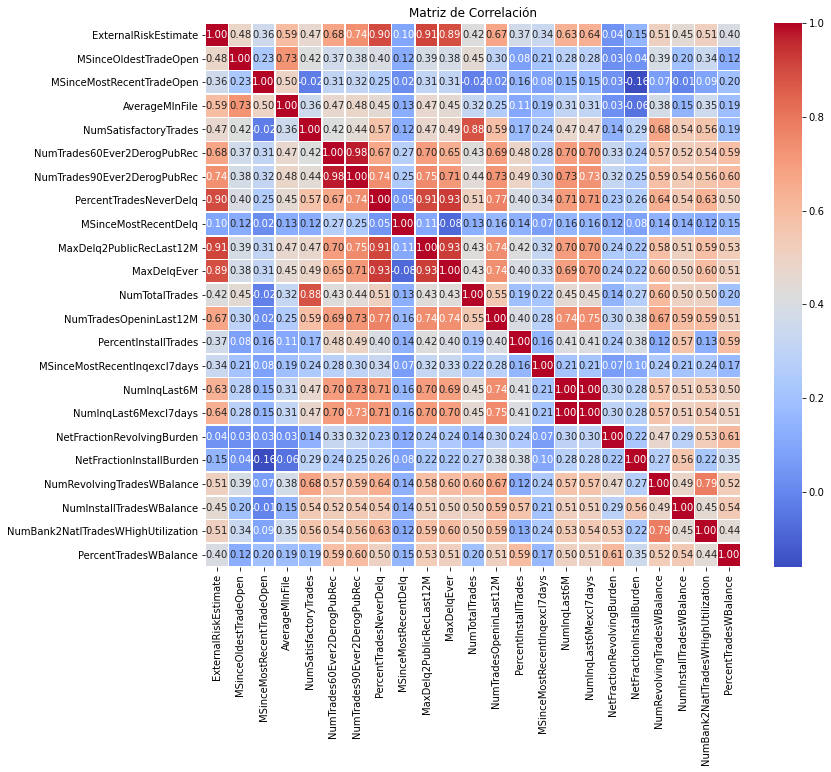

In [7]:


# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [8]:
# Observar la distribución de las variables
hist = ClassHistogram().explain_data(X_train, y_train, name='Train Data')
show(hist)

<!-- http://127.0.0.1:7001/2219299388720/ -->

# Árboles de decisión

Para esta primera parte crearemos árboles con los hiperparámetros por defecto de las librerías

In [9]:
# Entrenar modelo
tree = ClassificationTree()
tree.fit(X_train, y_train)

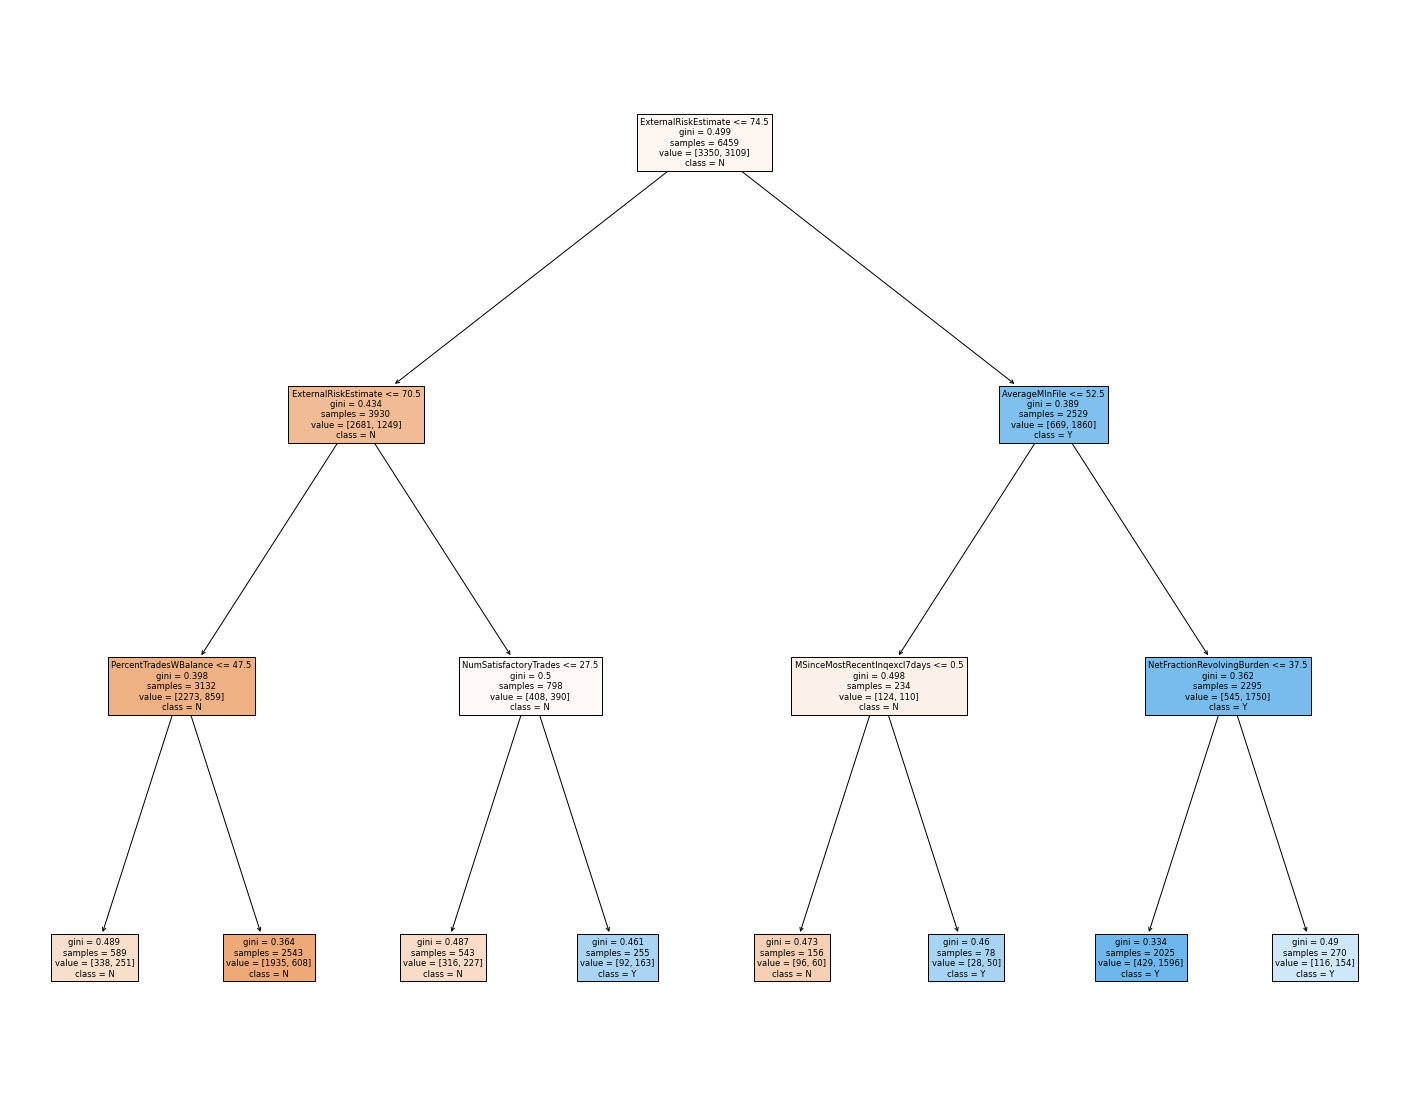

In [10]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree._model(),
                   feature_names=feature_cols,
                   class_names=['N', 'Y'],
                   filled=True)

In [11]:
# Para interpretación global
tree_global = tree.explain_global()
show(tree_global)

<!-- http://127.0.0.1:7001/2219335543056/ -->

In [12]:
# Crear un nuevo árbol de clasificación con un límite en el número máximo de individuos por hoja
tree_with_leaf_limit = ClassificationTree(min_samples_leaf=100, max_depth=None)
tree_with_leaf_limit.fit(X_train, y_train)

# Explicar el árbol globalmente
tree_global_with_leaf_limit = tree_with_leaf_limit.explain_global()
show(tree_global_with_leaf_limit)

<!-- http://127.0.0.1:7001/2219347577584/ -->

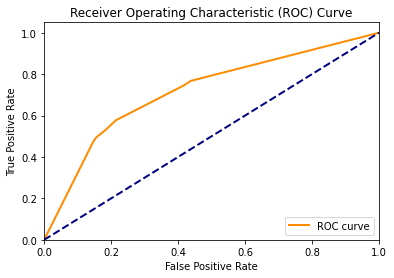

In [13]:


# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test.map({'Bad': 0, 'Good': 1}), tree.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [14]:
print(f"DT AUC: {roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]):.2f}")

DT AUC: 0.72


In [15]:


# Predicciones del modelo en el conjunto de test
y_pred = tree.predict(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calcular precisión
precision = precision_score(y_test, y_pred, pos_label='Good')
print(f"Precision: {precision:.2f}")

# Calcular recall
recall = recall_score(y_test, y_pred, pos_label='Good')
print(f"Recall: {recall:.2f}")

# Calcular F1-score
f1 = f1_score(y_test, y_pred, pos_label='Good')
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.69
Precision: 0.72
Recall: 0.58
F1 Score: 0.64


In [16]:
# Ejemplos para interpretación local
tree_local = tree.explain_local(X_test[:10], y_test[:10], name='EBM')
show(tree_local)

<!-- http://127.0.0.1:7001/2219347606496/ -->

## Búsqueda de hiperparámetros

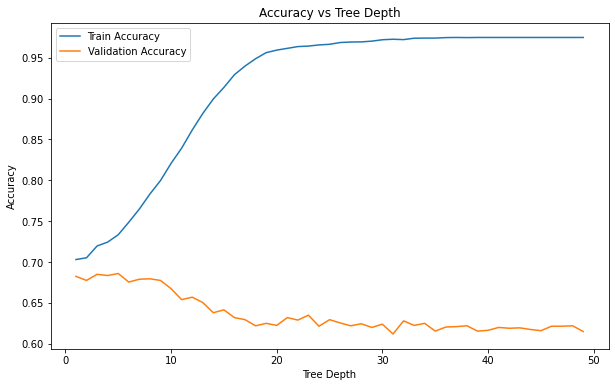

In [17]:
# Prueba de distintos valores de profundidad
depths = range(1, 50)
train_accuracies = []
test_accuracies = []

for depth in depths:
    tree = ClassificationTree(max_depth=depth)
    tree.fit(X_train, y_train)
    train_accuracies.append(tree.score(X_train, y_train))
    test_accuracies.append(tree.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, test_accuracies, label='Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Tree Depth')
plt.legend()
plt.show()

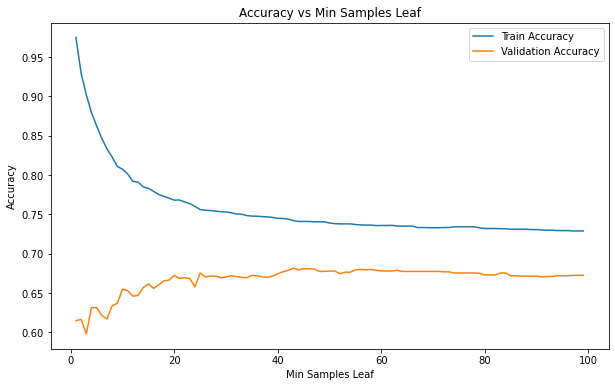

In [18]:
# Prueba de distintos valores de min_samples_leaf
min_samples_leaf_values = range(1, 100)
train_accuracies_leaf = []
test_accuracies_leaf = []

for min_samples_leaf in min_samples_leaf_values:
    tree = ClassificationTree(min_samples_leaf=min_samples_leaf, max_depth=None)
    tree.fit(X_train, y_train)
    train_accuracies_leaf.append(tree.score(X_train, y_train))
    test_accuracies_leaf.append(tree.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_accuracies_leaf, label='Train Accuracy')
plt.plot(min_samples_leaf_values, test_accuracies_leaf, label='Validation Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Min Samples Leaf')
plt.legend()
plt.show()

In [19]:
# Test the absolute best combination of depth and min_samples_leaf
depths = range(1, 10)
min_samples_leaf_values = range(10, 50, 5)

best_depth = None
best_min_samples_leaf = None
best_accuracy = 0

for depth in depths:
    for min_samples_leaf in min_samples_leaf_values:
        tree = ClassificationTree(max_depth=depth, min_samples_leaf=min_samples_leaf)
        tree.fit(X_train, y_train)
        accuracy = tree.score(X_test, y_test)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth
            best_min_samples_leaf = min_samples_leaf

print(f"Best Depth: {best_depth}")
print(f"Best Min Samples Leaf: {best_min_samples_leaf}")
print(f"Best Accuracy: {best_accuracy:.2f}")

Best Depth: 5
Best Min Samples Leaf: 20
Best Accuracy: 0.69


## Modelo final e interpretabilidad

### Interpretabilidad global

In [30]:
# Crear un nuevo árbol de clasificación con un límite en el número máximo de individuos por hoja
tree_final = ClassificationTree(min_samples_leaf=100, max_depth=5)
tree_final.fit(X_train, y_train)

# Explicar el árbol globalmente
tree_final_global = tree_final.explain_global()
show(tree_final_global)

<!-- http://127.0.0.1:7001/2219299793840/ -->

In [31]:
tree_final._model().feature_importances_

array([0.77320669, 0.0314845 , 0.        , 0.05710476, 0.02953904,
       0.        , 0.        , 0.02236453, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01291708, 0.        ,
       0.        , 0.        , 0.03174181, 0.        , 0.        ,
       0.        , 0.        , 0.04164159])

### Métricas

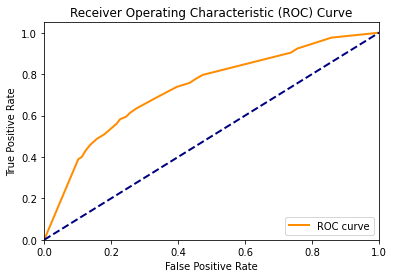

In [32]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test.map({'Bad': 0, 'Good': 1}), tree_final.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [33]:
print(f"DT AUC: {roc_auc_score(y_test, tree_final.predict_proba(X_test)[:,1]):.2f}")

DT AUC: 0.73


In [34]:
# Predicciones del modelo en el conjunto de test
y_pred = tree_final.predict(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calcular precisión
precision = precision_score(y_test, y_pred, pos_label='Good')
print(f"Precision: {precision:.2f}")

# Calcular recall
recall = recall_score(y_test, y_pred, pos_label='Good')
print(f"Recall: {recall:.2f}")

# Calcular F1-score
f1 = f1_score(y_test, y_pred, pos_label='Good')
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.68
Precision: 0.69
Recall: 0.59
F1 Score: 0.64


### Interpretación local

Mete aquí lo de la interpretacion local

## Trasformación a reglas

In [35]:
print(export_text(tree_final._model(), feature_names=feature_cols))

|--- ExternalRiskEstimate <= 74.50
|   |--- ExternalRiskEstimate <= 70.50
|   |   |--- PercentTradesWBalance <= 47.50
|   |   |   |--- NetFractionRevolvingBurden <= 20.50
|   |   |   |   |--- PercentTradesNeverDelq <= 73.00
|   |   |   |   |   |--- class: Bad
|   |   |   |   |--- PercentTradesNeverDelq >  73.00
|   |   |   |   |   |--- class: Good
|   |   |   |--- NetFractionRevolvingBurden >  20.50
|   |   |   |   |--- class: Bad
|   |   |--- PercentTradesWBalance >  47.50
|   |   |   |--- MSinceOldestTradeOpen <= 146.50
|   |   |   |   |--- ExternalRiskEstimate <= 63.50
|   |   |   |   |   |--- class: Bad
|   |   |   |   |--- ExternalRiskEstimate >  63.50
|   |   |   |   |   |--- class: Bad
|   |   |   |--- MSinceOldestTradeOpen >  146.50
|   |   |   |   |--- ExternalRiskEstimate <= 67.50
|   |   |   |   |   |--- class: Bad
|   |   |   |   |--- ExternalRiskEstimate >  67.50
|   |   |   |   |   |--- class: Bad
|   |--- ExternalRiskEstimate >  70.50
|   |   |--- NumSatisfactoryTrades <

In [36]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]

    return rules

In [37]:
rules = get_rules(tree_final._model(), feature_cols, ['N','Y'])
for r in rules:
    print(r)

if (ExternalRiskEstimate > 74.5) and (AverageMInFile > 52.5) and (NetFractionRevolvingBurden <= 37.5) and (PercentTradesNeverDelq > 94.5) and (NumSatisfactoryTrades > 9.5) then class: Y (proba: 82.73%) | based on 1,558 samples
if (ExternalRiskEstimate <= 74.5) and (ExternalRiskEstimate <= 70.5) and (PercentTradesWBalance > 47.5) and (MSinceOldestTradeOpen > 146.5) and (ExternalRiskEstimate <= 67.5) then class: N (proba: 74.54%) | based on 1,131 samples
if (ExternalRiskEstimate <= 74.5) and (ExternalRiskEstimate <= 70.5) and (PercentTradesWBalance > 47.5) and (MSinceOldestTradeOpen <= 146.5) and (ExternalRiskEstimate > 63.5) then class: N (proba: 79.57%) | based on 563 samples
if (ExternalRiskEstimate <= 74.5) and (ExternalRiskEstimate <= 70.5) and (PercentTradesWBalance > 47.5) and (MSinceOldestTradeOpen <= 146.5) and (ExternalRiskEstimate <= 63.5) then class: N (proba: 88.55%) | based on 524 samples
if (ExternalRiskEstimate <= 74.5) and (ExternalRiskEstimate <= 70.5) and (PercentTrade